In [1]:
%cd C:\Users\yukir\Documents\GitHub\Scrapper\py

from nlp_processing import *
set_global_determinism(seed=1337)

%cd C:\Users\yukir\Documents\Monicas_workspace\Korea_medicine\LDA

C:\Users\yukir\Documents\GitHub\Scrapper\py
True
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17506688944816752301
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 5031032587735001129
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9883535296
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2878776493597924773
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 8672875681266734106
physical_device_desc: "device: XLA_GPU device"
]
tf 2.2.0
set_global_determinism(seed=1337) 이거 꼭 해라
set_global_determinism(seed=1337) 이거 꼭 해라
set_global_determinism(seed=1337) 이거 꼭 해라
C:\Users\yukir\Documents\Monicas_workspace\Korea_medicine\LDA


In [2]:
review_data = pd.read_csv('stemmed_clean.csv', index_col = 0)
review_data.head()

df = review_data.copy()
# df = df.drop_duplicates()
# df = df.dropna()
# # df = df.drop(index=0)

# df = df.reset_index()
# df = df.drop(columns= '1')
print(df.shape)
df.head()

(14891, 9)


,hospital,stars,reviews,adress,cleaned_review,noun,stemmed,stemmed_clean,noun_clean
0,청주나비솔한의원,10.0,병원이 전반적으로 깔끔해서 쾌적했어요대기가 좀 있지만 심하진 않은편이었고 간호사분들...,충북,병원이 전반적으로 깔끔해서 쾌적했어요 대기가 좀 있지만 심하진 않은 편이었고 간호사...,"['병원', '전반', '대기', '좀', '간호사', '의사', '설명', '주말...","['병원', '전반', '깔끔하다', '쾌적하다', '대기', '있다', '심하다'...",[병원 전반 깔끔하다 쾌적하다 대기 있다 심하다 않다 펴다 간호사 친절하다 의사 친...,[병원 전반 대기 좀 간호사 의사 설명 주말 공휴일 진료 집 좀 가기 항상]
1,청주나비솔한의원,7.5,체인 한의원이라서 망설였는데 시설도 깔끔하고 진료도 친절하게 너무 잘 봐주셨어요 그...,충북,체인 한의원이라서 망설였는데 시설도 깔끔하고 진료도 친절하게 너무 잘 봐주셨어요 그...,"['체인', '한의원', '시설', '진료', '양심', '진료', '것', '믿음...","['체인', '한의원', '망설이다', '시설', '깔끔하다', '진료', '친절하...",[체인 한의원 망설이다 시설 깔끔하다 진료 친절하다 자다 보다 양심 진료 하다 같다...,[체인 한의원 시설 진료 양심 진료 것 믿음 무조건 한약 치료 모습 믿음]
2,청주나비솔한의원,10.0,사고 후유증으로 놀라서 한의원 방문 하였고 침 놔주시고 청심환 처방 해주셨습니다 편...,충북,사고 후유증으로 놀라서 한의원 방문하였고 침 놔주시고 청심환 처방해주셨습니다 편안하...,"['사고', '후유증', '한의원', '방문', '침', '청심환', '처방', '...","['사고', '후유증', '놀라다', '한의원', '방문', '하다', '놓다', ...",[사고 후유증 놀라다 한의원 방문 하다 놓다 청심환 처방 해주다 편안하다 휴식 하다...,[사고 후유증 한의원 방문 침 청심환 처방 휴식 의원 내부 다음 기회 또 방문]
3,청주나비솔한의원,8.8,오래 서있으면 발바닥이 너무 아파서 방문했습니다 진료랑 치료받는 건 괜찮았는데 별로...,충북,오래 서 있으면 발바닥이 너무 아파서 방문했습니다 진료랑 치료받는 건 괜찮았는데 별...,"['발바닥', '방문', '진료', '건', '별로', '효과', '못', '계속'...","['서다', '있다', '발바닥', '아프다', '방문', '하다', '진료', '...",[서다 있다 발바닥 아프다 방문 하다 진료 치료받다 괜찮다 별로 효과 보다 꾸준하다...,[발바닥 방문 진료 건 별로 효과 못 계속 대체 뭐 문제 계속]
4,청주나비솔한의원,10.0,다이어트 환 처방 받았습니다 효과도 꽤 있었고 처음부터 무리하지 않는 선에서 체질에...,충북,다이어트 환 처방받았습니다 효과도 꽤 있었고 처음부터 무리하지 않는 선에서 체질에 ...,"['다이어트', '환', '처방', '효과', '꽤', '처음', '선', '체질'...","['다이어트', '처방', '받다', '효과', '있다', '처음', '무리하다',...",[다이어트 처방 받다 효과 있다 처음 무리하다 않다 체질 맞추다 진단 해주다 체질 ...,[다이어트 환 처방 효과 꽤 처음 선 체질 진단 체질 평소 식 습관 운동 상태 확인...


In [3]:
df = df[['stars', 'cleaned_review']]
df= df[df['stars']<=6.2]
# df['noun_clean']=df['noun_clean'].replace('[','')
# df['noun_clean']=df['noun_clean'].replace(']','')
df.head()

,stars,cleaned_review
108,4.0,목 디스크 때문에 며칠 동안 목이 너무너무 아팠어요 마침 집 앞에 있는 한의원이 있...
188,6.0,지인 소개로 갔는데 친절하고 청결해 좋았고 기다리지 않았으며 늦은 시간에도 진료할 ...
201,5.5,침 치료만 좋아요 1진료실에서 침 치료할 때는 아픈 부위에다가 직접 침 놓으며 안 ...
204,5.5,박 선생님께서 충분한 설명과 치료 과정을 안내해주시고 꾸준히 치료받는 과정에서 저한...
210,5.5,평소에 허리랑 목이 안 좋았는데 갑자기 또 아파서 한의원에 방문했어요 침 맞는 게 ...


In [4]:
df.to_csv('negative.csv')

In [5]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from gensim import corpora, models
from gensim.models import CoherenceModel
import gensim
import matplotlib.pyplot as plt

In [6]:
from gensim.models.ldamodel import LdaModel 
from gensim.models.callbacks import CoherenceMetric 
from gensim import corpora 
from gensim.models.callbacks import PerplexityMetric 
import logging 
import pickle 
import pyLDAvis

from gensim.models.coherencemodel import CoherenceModel 
import matplotlib.pyplot as plt

import pyLDAvis.gensim
pyLDAvis.enable_notebook()

from konlpy.tag import Mecab 
from konlpy.tag import Okt
okt = Okt()
from tqdm import tqdm 
import re 
import pickle 
import csv

In [7]:

# from pyLDAvis import gensim_models
# import pyLDAvis.gensim as gensimvis
# import pyLDAvis.gensim_models as gensimvis
# pyLDAvis.enable_notebook()

In [8]:
def clean_text(text): 
    """ 한글, 영문, 숫자만 남기고 제거한다. 
    :param text: 
    :return: 
    """ 
    text = text.replace(".", " ").strip() 
    text = text.replace("·", " ").strip() 
    pattern = '[^ ㄱ-ㅣ가-힣|0-9|a-zA-Z]+' 
    text = re.sub(pattern=pattern, repl='', string=text) 
    return text 
    
def get_nouns(tokenizer, sentence): 
    """ 단어의 길이가 2이상인 일반명사(NNG),
     고유명사(NNP), 외국어(SL)만을 반환한다. 
     :param tokenizer: 
     :param sentence: :return: """ 
    tagged = tokenizer.nouns(sentence)
    nouns = [s for s in tagged if len(s)>1] 
     
    return nouns 
     
     
def tokenize(df): 
    tokenizer = okt
    processed_data = [] 
    for sent in tqdm(df['cleaned_review']):
        sentence = clean_text(sent.replace('\n', '').strip()) 
        processed_data.append(get_nouns(tokenizer, sentence)) 
        
    return processed_data
    
    
def save_processed_data(processed_data): 
    """ 토큰 분리한 데이터를 csv로 저장 :param processed_data: :return: """ 
    
    with open('stemm_token.csv', 'w', newline='', encoding='utf-8') as f: 
        writer = csv.writer(f) 
        for data in processed_data:
             writer.writerow(data)


In [9]:
if __name__ == '__main__':
     # df = pd.read_csv('negative.csv', index_col = 0)
     processed_data = tokenize(df) # description 부분을 토크나이징 한다. 
     
     # 토큰 분리한 데이터를 저장 
     save_processed_data(processed_data)



100%|██████████| 481/481 [00:08<00:00, 55.68it/s]


100%|██████████| 481/481 [00:00<00:00, 481379.20it/s]
2021-11-03 18:12:03,435 : INFO : using symmetric alpha at 0.5
2021-11-03 18:12:03,435 : INFO : using symmetric eta at 0.5
2021-11-03 18:12:03,436 : INFO : using serial LDA version on this node
2021-11-03 18:12:03,436 : INFO : running online (single-pass) LDA training, 2 topics, 1 passes over the supplied corpus of 481 documents, updating model once every 481 documents, evaluating perplexity every 481 documents, iterating 50x with a convergence threshold of 0.001000
2021-11-03 18:12:03,437 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2021-11-03 18:12:03,621 : INFO : -5.534 per-word bound, 46.3 perplexity estimate based on a held-out corpus of 481 documents with 2458 words


Number of unique tokens: 142
Number of documents: 481


2021-11-03 18:12:03,622 : INFO : PROGRESS: pass 0, at document #481/481
2021-11-03 18:12:03,781 : INFO : topic #0 (0.500): 0.017*"부항" + 0.015*"자주" + 0.014*"얘기" + 0.014*"찜질" + 0.014*"건물" + 0.013*"모두" + 0.013*"복용" + 0.013*"결제" + 0.013*"한번" + 0.013*"시술"
2021-11-03 18:12:03,782 : INFO : topic #1 (0.500): 0.020*"주사" + 0.015*"리뷰" + 0.015*"대충" + 0.014*"피부" + 0.013*"다만" + 0.013*"시술" + 0.013*"말씀" + 0.012*"권유" + 0.012*"여러" + 0.012*"원인"
2021-11-03 18:12:03,782 : INFO : topic diff=0.404385, rho=1.000000
2021-11-03 18:12:03,783 : INFO : LdaModel lifecycle event {'msg': 'trained LdaModel(num_terms=142, num_topics=2, decay=0.5, chunksize=2000) in 0.35s', 'datetime': '2021-11-03T18:12:03.783703', 'gensim': '4.1.2', 'python': '3.8.11 (default, Aug  6 2021, 09:57:55) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19042-SP0', 'event': 'created'}
2021-11-03 18:12:03,784 : INFO : using ParallelWordOccurrenceAccumulator(processes=15, batch_size=64) to estimate probabilities from sliding windows


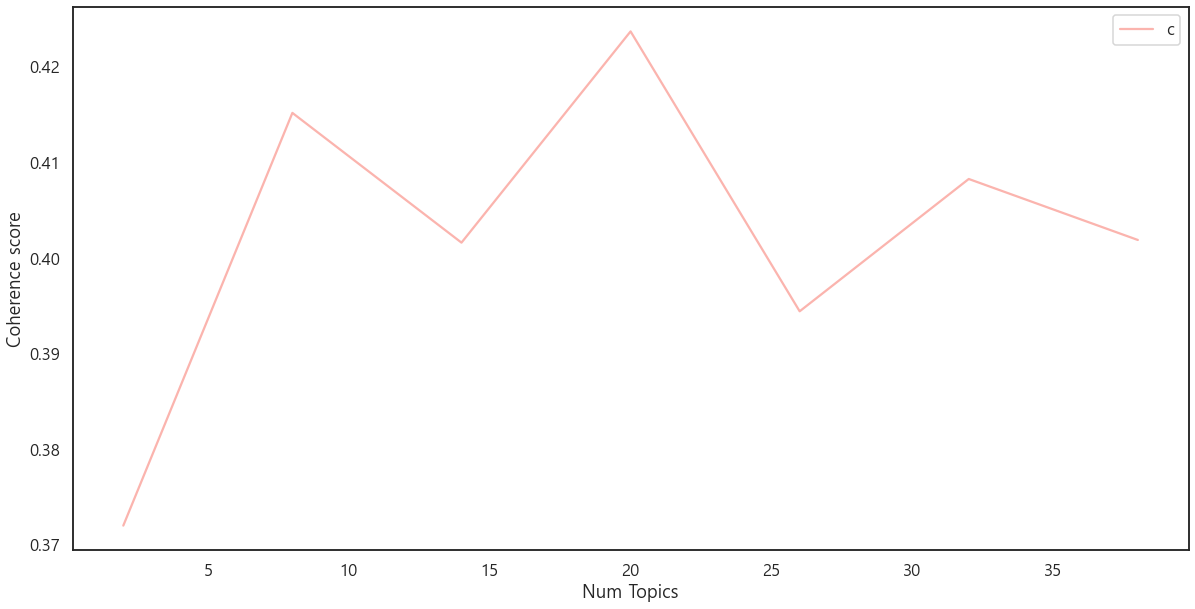

In [10]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3): 
    """ Compute c_v coherence for various number of topics 
    
    Parameters: 
    ---------- 
    dictionary : Gensim dictionary 
    corpus : Gensim corpus 
    texts : List of input texts 
    limit : Max num of topics
    Returns: 
    ------- 
    model_list : List of LDA topic models 
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics 
    """ 
     
    coherence_values = [] 
    model_list = [] 
    
    for num_topics in range(start, limit, step): 
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics) 
        model_list.append(model) 
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v') 
        coherence_values.append(coherencemodel.get_coherence()) 
        
    return model_list, coherence_values 
    
    
def find_optimal_number_of_topics(dictionary, corpus, processed_data): 
    limit = 40; 
    start = 2; 
    step = 6; 
    
    model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=processed_data, start=start, limit=limit, step=step) 
    x = range(start, limit, step) 
    plt.plot(x, coherence_values) 
    plt.xlabel("Num Topics") 
    plt.ylabel("Coherence score") 
    plt.legend(("coherence_values"), loc='best') 
    plt.show() 
    
if __name__ == '__main__': 
    processed_data = [sent.strip().split(",") for sent in tqdm(open('stemm_token.csv', 'r', encoding='utf-8').readlines())] 
    # 정수 인코딩과 빈도수 생성 
    dictionary = corpora.Dictionary(processed_data) 
    
    # 출현빈도가 적거나 자주 등장하는 단어는 제거 
    dictionary.filter_extremes(no_below=10, no_above=0.05) 
    corpus = [dictionary.doc2bow(text) for text in processed_data] 
    print('Number of unique tokens: %d' % len(dictionary)) 
    print('Number of documents: %d' % len(corpus)) 
    
    logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO) 
    
    # 최적의 토픽 수 찾기 
    # 
    find_optimal_number_of_topics(dictionary, corpus, processed_data)


In [13]:
if __name__ == '__main__': 
    processed_data = [sent.strip().split(",") for sent in tqdm(open('stemm_token.csv', 'r', encoding='utf-8').readlines())] 
    
    # 정수 인코딩과 빈도수 생성 d
    dictionary = corpora.Dictionary(processed_data) 
    
    # 출현빈도가 적거나 자주 등장하는 단어는 제거 
    dictionary.filter_extremes(no_below=10, no_above=0.05) 
    corpus = [dictionary.doc2bow(text) for text in processed_data] 
    print('Number of unique tokens: %d' % len(dictionary)) 
    print('Number of documents: %d' % len(corpus)) 
    
    logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO) 
    
    # 최적의 토픽 수 찾기 => 35개로 나옴 
    # # find_optimal_number_of_topics(dictionary, corpus, processed_data) 
    # # exit() 
    # 
    perplexity_logger = PerplexityMetric(corpus=corpus, logger='shell') 
    coherence_logger = CoherenceMetric(corpus=corpus, coherence="u_mass", logger='shell') 
    
    lda_model = LdaModel(corpus, id2word=dictionary, num_topics=20, passes=30, callbacks=[coherence_logger, perplexity_logger]) 
    
    topics = lda_model.print_topics(num_words=5) 
    for topic in topics: 
        print(topic) 
        
    # Compute Coherence Score using c_v 
    coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_data, dictionary=dictionary, coherence='c_v') 
    coherence_lda = coherence_model_lda.get_coherence() 
    print('\nCoherence Score (c_v): ', coherence_lda) 
    
    # Compute Coherence Score using UMass 
    coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_data, dictionary=dictionary, coherence="u_mass") 
    coherence_lda = coherence_model_lda.get_coherence() 
    print('\nCoherence Score (u_mass): ', coherence_lda) 
    
    
    # 저장 
    pickle.dump(corpus, open('lda_corpus.pkl', 'wb')) 
    dictionary.save('lda_dictionary.gensim') 
    lda_model.save('lda_model.gensim') 
    
    # pyLDAvis html 저장 
    lda_visualization = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary, sort_topics=True) 
    pyLDAvis.save_html(lda_visualization, 'lda_v3.html') 
    pyLDAvis.show(lda_visualization)


100%|██████████| 481/481 [00:00<00:00, 462932.59it/s]
2021-11-03 18:16:57,747 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-11-03 18:16:57,760 : INFO : built Dictionary(2363 unique tokens: ['가게', '대기실', '대해', '동안', '디스크']...) from 481 documents (total 12880 corpus positions)
2021-11-03 18:16:57,762 : INFO : Dictionary lifecycle event {'msg': "built Dictionary(2363 unique tokens: ['가게', '대기실', '대해', '동안', '디스크']...) from 481 documents (total 12880 corpus positions)", 'datetime': '2021-11-03T18:16:57.762666', 'gensim': '4.1.2', 'python': '3.8.11 (default, Aug  6 2021, 09:57:55) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19042-SP0', 'event': 'created'}
2021-11-03 18:16:57,764 : INFO : discarding 2221 tokens: [('대기실', 7), ('대해', 34), ('때문', 56), ('마침', 3), ('며칠', 8), ('선생님', 120), ('성의', 7), ('실과', 1), ('실망', 6), ('원장', 113)]...
2021-11-03 18:16:57,765 : INFO : keeping 142 tokens which were in no less than 10 and no more than 24 (=5.0%) documents
2021-

Number of unique tokens: 142
Number of documents: 481


2021-11-03 18:16:58,045 : INFO : Epoch 0: Perplexity estimate: 82.42934045076103
2021-11-03 18:16:58,134 : INFO : -6.367 per-word bound, 82.5 perplexity estimate based on a held-out corpus of 481 documents with 2458 words
2021-11-03 18:16:58,134 : INFO : PROGRESS: pass 1, at document #481/481
2021-11-03 18:16:58,197 : INFO : topic #19 (0.050): 0.068*"대답" + 0.050*"데스크" + 0.046*"부황" + 0.042*"나름" + 0.032*"후기" + 0.031*"기계" + 0.025*"부항" + 0.025*"기본" + 0.025*"오히려" + 0.024*"진행"
2021-11-03 18:16:58,197 : INFO : topic #13 (0.050): 0.072*"부항" + 0.058*"리뷰" + 0.054*"입원" + 0.042*"체질" + 0.042*"주변" + 0.034*"확인" + 0.032*"달라" + 0.026*"하니" + 0.026*"동안" + 0.025*"개월"
2021-11-03 18:16:58,198 : INFO : topic #0 (0.050): 0.094*"요법" + 0.059*"제대로" + 0.056*"갑자기" + 0.040*"전문" + 0.034*"복용" + 0.029*"이용" + 0.028*"자주" + 0.023*"거리" + 0.023*"요청" + 0.023*"직접"
2021-11-03 18:16:58,198 : INFO : topic #14 (0.050): 0.050*"여러" + 0.048*"가지" + 0.038*"주차" + 0.037*"항상" + 0.037*"보시" + 0.037*"응대" + 0.033*"이상" + 0.030*"동안" + 0.029*"

(0, '0.187*"요법" + 0.155*"갑자기" + 0.135*"제대로" + 0.044*"전문" + 0.044*"코로나"')
(1, '0.244*"진행" + 0.090*"분위기" + 0.068*"가면" + 0.059*"진맥" + 0.049*"진짜"')
(2, '0.092*"본인" + 0.072*"여자" + 0.069*"여러" + 0.068*"부위" + 0.048*"소리"')
(3, '0.100*"체질" + 0.088*"찜질" + 0.060*"잘못" + 0.047*"보험" + 0.044*"원래"')
(4, '0.105*"진짜" + 0.051*"시술" + 0.043*"권유" + 0.043*"달라" + 0.042*"개월"')
(5, '0.096*"결제" + 0.075*"이상" + 0.052*"하니" + 0.052*"이야기" + 0.039*"얘기"')
(6, '0.119*"정형외과" + 0.116*"보통" + 0.066*"디스크" + 0.047*"약도" + 0.042*"검색"')
(7, '0.130*"피부" + 0.110*"대충" + 0.049*"시술" + 0.046*"다리" + 0.043*"다만"')
(8, '0.123*"얘기" + 0.087*"아주" + 0.081*"양방" + 0.059*"한번" + 0.056*"모든"')
(9, '0.138*"말씀" + 0.070*"진찰" + 0.055*"태도" + 0.051*"건물" + 0.044*"호전"')
(10, '0.111*"전혀" + 0.097*"주말" + 0.088*"주사" + 0.085*"추가" + 0.077*"침술"')
(11, '0.189*"교통사고" + 0.092*"원인" + 0.058*"하루" + 0.057*"접수" + 0.038*"친절"')
(12, '0.106*"개선" + 0.059*"방법" + 0.052*"이용" + 0.050*"크게" + 0.050*"평일"')
(13, '0.092*"부항" + 0.087*"입원" + 0.076*"리뷰" + 0.067*"주변" + 0.060*"동안"')
(14, '

2021-11-03 18:17:07,057 : INFO : 15 accumulators retrieved from output queue
2021-11-03 18:17:07,094 : INFO : accumulated word occurrence stats for 773 virtual documents
2021-11-03 18:17:07,624 : INFO : Dictionary lifecycle event {'fname_or_handle': 'lda_dictionary.gensim', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2021-11-03T18:17:07.624994', 'gensim': '4.1.2', 'python': '3.8.11 (default, Aug  6 2021, 09:57:55) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19042-SP0', 'event': 'saving'}
2021-11-03 18:17:07,624 : INFO : saved lda_dictionary.gensim
2021-11-03 18:17:07,625 : INFO : LdaState lifecycle event {'fname_or_handle': 'lda_model.gensim.state', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2021-11-03T18:17:07.625997', 'gensim': '4.1.2', 'python': '3.8.11 (default, Aug  6 2021, 09:57:55) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19042-SP0', 'event': 'saving'}
2021-11-03 18:17:07,


Coherence Score (c_v):  0.3792453914835493

Coherence Score (u_mass):  -10.52125877700208


C:\Users\yukir\anaconda3\envs\NLP\lib\site-packages\pyLDAvis\_prepare.py:228: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info  = pd.DataFrame({'saliency': saliency, 'Term': vocab, \



Note: if you're in the IPython notebook, pyLDAvis.show() is not the best command
      to use. Consider using pyLDAvis.display(), or pyLDAvis.enable_notebook().
      See more information at http://pyLDAvis.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8888/    [Ctrl-C to exit]


127.0.0.1 - - [03/Nov/2021 18:17:12] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [03/Nov/2021 18:17:12] "GET /LDAvis.css HTTP/1.1" 200 -
127.0.0.1 - - [03/Nov/2021 18:17:12] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [03/Nov/2021 18:17:12] "GET /LDAvis.js HTTP/1.1" 200 -
127.0.0.1 - - [03/Nov/2021 18:17:12] code 404, message Not Found
127.0.0.1 - - [03/Nov/2021 18:17:12] "GET /favicon.ico HTTP/1.1" 404 -
